In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate random data

In [36]:
x=np.random.randint(0, 100, size=1000) #your test actual score
y=np.random.randint(0, 100, size=1000) # your prediction what score you get

In [37]:
df=pd.DataFrame({'actual':x, 'predicted':y})

## Visualize

<AxesSubplot:xlabel='actual', ylabel='predicted'>

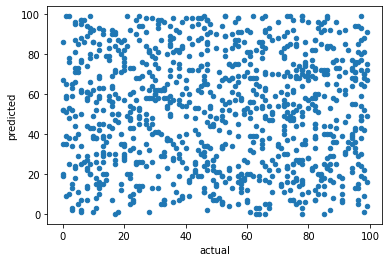

In [41]:
df.plot.scatter(x='actual', y='predicted')

## Calculate error:  prediction - actual

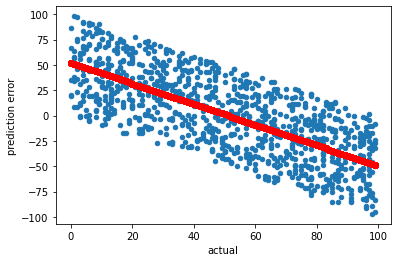

In [47]:
df=df.sort_values('actual', ascending=True)
df=df.reset_index(drop=True)
#this is a key point, as we use actual score (independent variable) for calculation of error
#we introduce autocorrelation. Variables are not independent
df['prediction error']=df.predicted-df.actual
ax=df.plot.scatter(x='actual', y='prediction error')
#trendline
z = np.polyfit(df.actual, df.pred_error, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r-o")

## Plot Dunning-Kruger effect plot

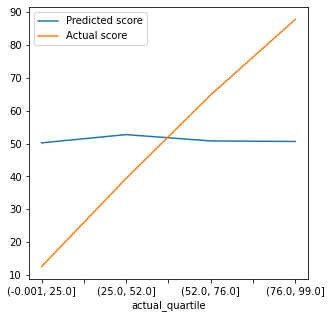

In [44]:
#magically we found Dunning-Kruger effect in random data
df['actual_quartile']=pd.qcut(df.actual, q=4)
fig, ax =plt.subplots(figsize=(5,5))
ax=df.groupby('actual_quartile')['predicted'].mean().plot(ax=ax)
ax=df.groupby('actual_quartile')['actual'].mean().plot(ax=ax)
ax.legend(["Predicted score", "Actual score"])

In [42]:
df.groupby('actual_quartile')['predicted'].mean()

actual_quartile
(-0.001, 25.0]    50.212598
(25.0, 52.0]      52.715953
(52.0, 76.0]      50.800000
(76.0, 99.0]      50.631799
Name: predicted, dtype: float64